# Part II - Influencing Factors on Loan Outcome Status, Borrower's APR, Interest rates and differences on loans
## by Madaki Fatsen Timon

## Investigation Overview


> This presentation looks at factors affecting outcome of loan status, Borrower APR, Borrower Interest Rate and differences on loan. It also states the relationship between affected features. Focus was layed on employment status as it influence loan status; Loan Original Amount as it relates Borrower Rateor APR; Loan term as it affects Borrower APR; and the relationship between Loan Original amount and loan term.


## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. After handling tidiness and cleanliness issues the dataset was left with 99,145 loan data records with 15 features.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv('./prosperLoanData.csv')

In [3]:
# drop duplicates values with reference to listingkey and listingnumber index
loan_df.drop_duplicates(['ListingKey','ListingNumber'],keep='first',inplace=True)

In [4]:
#choosing only the needed variables
loan_df_needed = loan_df[['Term', 'LoanStatus','BorrowerAPR','BorrowerRate','ListingCategory (numeric)',
                         'BorrowerState', 'Occupation', 'EmploymentStatus',
                         'IncomeRange', 'StatedMonthlyIncome', 'LoanOriginalAmount',
                         'MonthlyLoanPayment', 'DebtToIncomeRatio', 'IncomeVerifiable']]

In [5]:
#drop remaing duplicates
loan_df_needed.drop_duplicates(inplace=True)

In [6]:
#rename ListingCategory (numeric) to ListingCategoryNumeric
loan_df_needed.rename(columns={'ListingCategory (numeric)':'ListingCategoryNumeric'}, inplace=True)

In [7]:
# Fill NaN values in EmploymentStatus column with Not available
loan_df_needed['EmploymentStatus'].fillna('Not available',inplace=True)

In [8]:
# Fill NaN values in Occupation column with Other
loan_df_needed['Occupation'].fillna('Other',inplace=True)

In [9]:
#drop all null values
loan_df_needed=loan_df_needed.dropna()

In [10]:
# Listing Category Numeric Labels.
list_numeric_def = {0:'Not Available', 1:'Debt Consolidation', 2:'Home Improvement', 3:'Business', 4:'Personal Loan', 
                    5:'Student Use', 6:'Auto', 7:'Other', 8:'Baby&Adoption', 9:'Boat', 10:'Cosmetic Procedure', 
                    11:'Engagement Ring', 12:'Green Loans', 13:'Household Expenses', 14:'Large Purchases', 
                    15:'Medical/Dental', 16:'Motorcycle', 17:'RV', 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'}


In [11]:
'''
creating a list, loop over dataset by checking each numeric value on the ListingCategoryNumeric column to list_numeric_def
dictionary and appending the corresponding label to the list
'''

label_list=[]
for i in range(loan_df_needed.shape[0]):
    for j in range(len(list_numeric_def)):
        if loan_df_needed['ListingCategoryNumeric'].values[i] == list(list_numeric_def.keys())[j]:
            label_list.append(list(list_numeric_def.values())[j])

In [12]:
# adding ListingCategoryLabels as a new column
loan_df_needed['ListingCategoryLabels'] = label_list

In [13]:
base_color = sb.color_palette()[0]

In [14]:
#We will be selecting only 6 of loan status with the highest counts
loan_status_cats = ['Current', 'Completed', 'Chargedoff', 'Defaulted', 'Past Due (1-15 days)', 'Past Due (31-60 days)']

# return the types of loan status with the categories and orderedness
loan_cats = pd.api.types.CategoricalDtype(ordered=True, categories=loan_status_cats)

# convert the "LoanStatus" column into an ordered categorical type using pandas.astype() 
loan_df_needed['LoanStatus'] = loan_df_needed['LoanStatus'].astype(loan_cats);

In [15]:
#picking a few of the employment status to work with and having the result in a new dataset
loan_df_needed_sub = loan_df_needed.loc[loan_df_needed['EmploymentStatus'].isin(['Employed', 'Other', 'Full-time', 'Not available', 
                                                          'Self-employed'])]

In [18]:
# adding EmploymentType column
loan_df_needed['EmploymentType'] = loan_df_needed['EmploymentStatus'].apply(lambda x:x.split()[0])
# fuel_econ['fuel'] = fuel_econ['fuelType'].apply(lambda x:x.split()[0])
loan_df_needed.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategoryNumeric,BorrowerState,Occupation,EmploymentStatus,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,DebtToIncomeRatio,IncomeVerifiable,ListingCategoryLabels,EmploymentType
0,36,Completed,0.16516,0.1580,0,CO,Other,Self-employed,"$25,000-49,999",3083.333333,9425,330.43,0.17,True,Not Available,Self-employed
1,36,Current,0.12016,0.0920,2,CO,Professional,Employed,"$50,000-74,999",6125.000000,10000,318.93,0.18,True,Home Improvement,Employed
2,36,Completed,0.28269,0.2750,0,GA,Other,Not available,Not displayed,2083.333333,3001,123.32,0.06,True,Not Available,Not
3,36,Current,0.12528,0.0974,16,GA,Skilled Labor,Employed,"$25,000-49,999",2875.000000,10000,321.45,0.15,True,Motorcycle,Employed
4,36,Current,0.24614,0.2085,2,MN,Executive,Employed,"$100,000+",9583.333333,15000,563.97,0.26,True,Home Improvement,Employed


In [19]:
list(loan_df_needed)

['Term',
 'LoanStatus',
 'BorrowerAPR',
 'BorrowerRate',
 'ListingCategoryNumeric',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'IncomeRange',
 'StatedMonthlyIncome',
 'LoanOriginalAmount',
 'MonthlyLoanPayment',
 'DebtToIncomeRatio',
 'IncomeVerifiable',
 'ListingCategoryLabels',
 'EmploymentType']

In [20]:
#myScatterPlot function
def myScatterPlot(x_axis, y_axis, xlabel, ylabel, title):
    sb.regplot(data = loan_df_needed, x = x_axis, y = y_axis, x_jitter=0.3, 
           scatter_kws={'alpha':1/20});
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

## Employment Status vs Loan Status

> We can see that, there is a high count of 48000+ for loan being serviced (current loan status) by the employed. Full-time has the higest count of 12000+ for loan status outcome as completed. Employment status to a degree affects Loan status. 

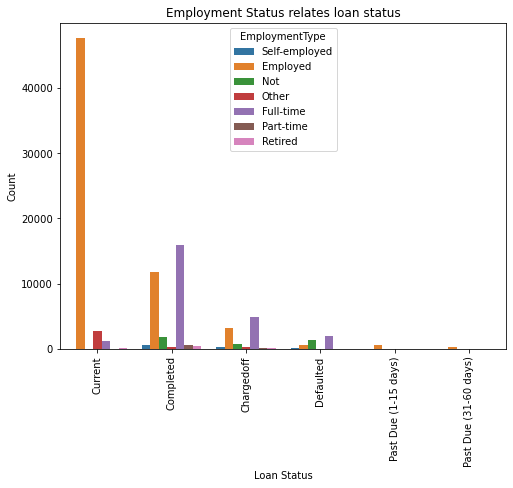

In [26]:
plt.figure(figsize=[8, 6])
sb.countplot(data = loan_df_needed, x = 'LoanStatus', hue = 'EmploymentType')
plt.title('Employment Status relates loan status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation = 90);

## Borrower APR vs Loan Original Amount

> Borrower APR is inversely proportional to the Loan Original Amount. This is proven by the negative correlation between Borrower APR and Loan Original Amount. A Borrower APR decreases as the Loan Original Amount increases. Most of the loan original amount between 1000 and 15,000 are possessed by borrowers with higher Annual Percentage Rate(APR).

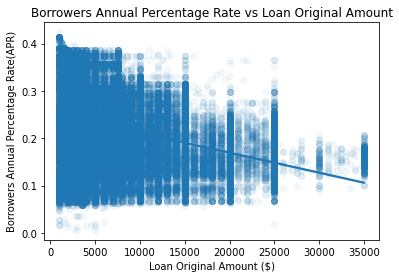

In [28]:
#Plotting a scatter plot for loan original amount and BorrowerAPR
myScatterPlot('LoanOriginalAmount', 'BorrowerAPR', 'Loan Original Amount ($)', 'Borrowers Annual Percentage Rate(APR)', 
              'Borrowers Annual Percentage Rate vs Loan Original Amount')

## Borrower Rate vs Loan Original Amount

> Also, there is a negative correlation between Borrower's Rate and the Loan Original Amount. Borrower's Rate decreases as the Loan Original Amount increases. It is observed most of the loans with loan original amount between 1000 and 13,000 are possessed by borrowers with higher Rate.

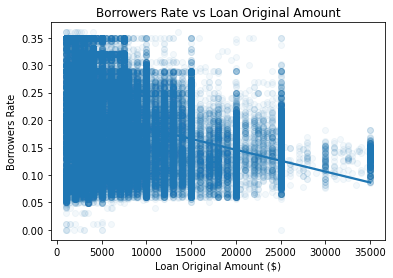

In [29]:
#Plotting a scatter plot for loan original amount and BorrowerRate
myScatterPlot('LoanOriginalAmount', 'BorrowerRate', 'Loan Original Amount ($)', 'Borrowers Rate', 
              'Borrowers Rate vs Loan Original Amount')

In [21]:
#myViolinPlot function
def myViolinPlot(x_axis, y_axis, base_color, xlabel, ylabel, title):
    sb.violinplot(data = loan_df_needed, x = x_axis, y = y_axis, color = base_color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation = 90);

## Borrower APR vs Loan Term

> The loan term with the highest median is 60. The loan term 60 also possess the highest distribution evident by its wideness. The next term with high median is 36 while term 12 has the lowest median. This indicates that there is a positive corelation between Borrower rate and loan term. As the value of loan term increases, Borrower rate also increases.

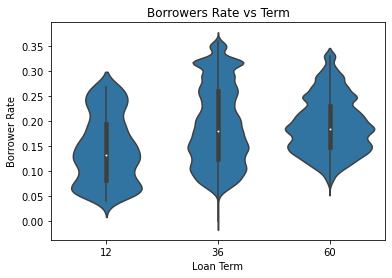

In [22]:
#calling myViolinPlot function to plot BorrowerRate vs Term
myViolinPlot('Term', 'BorrowerRate', base_color, 'Loan Term', 'Borrower Rate',
             'Borrowers Rate vs Term')
plt.xticks(rotation = 0);


In [30]:
#myMultivariateScatterPlot function
def myMultivariateScatterPlot(x_axis, y_axis,x_label, y_label, col_val, title):
    g = sb.FacetGrid(data = loan_df_needed, col = col_val, height = 5, col_wrap = 3)
    g.map(plt.scatter, x_axis, y_axis, alpha = 1/20)
    g.add_legend()
    g.set_xlabels(x_label)
    g.set_ylabels(y_label)
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(title);

## Borrower APR by Loan Original Amount and Term

> The visualization below shows higher distributution on term 36 and term 60. There are indications of points on higher amounts collected exceeding 25,000 dollars. Term 12 has indications of amounts limited at 25,000 dollars. As the term increased to 36 and 60, Loan original amount was indicated at 35,000 dollars. Term 60 has a denser distribution at 35,000 as compared term 36.

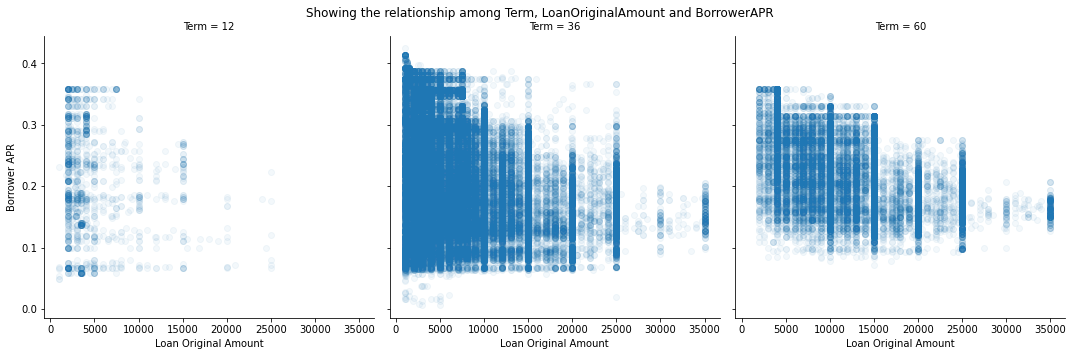

In [31]:
#multivariate scatter plot Plot to Show the relationship among LoanOriginalAmount, BorrowerAPR and Term'
myMultivariateScatterPlot('LoanOriginalAmount', 'BorrowerAPR', 'Loan Original Amount', 'Borrower APR', 
                          'Term', 'Showing the relationship among Term, LoanOriginalAmount and BorrowerAPR')

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [23]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 1005060 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
^C

Interrupted



KeyboardInterrupt



> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
